<a href="https://colab.research.google.com/github/sukritikala/Deep-Learning-Models/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew , stats , chi2_contingency
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [252]:
df = pd.read_csv("/content/customer_churn_large_dataset.csv")

In [253]:
df.head

<bound method NDFrame.head of        CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76        

In [254]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [255]:
#checking for missing values in a dataset
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [256]:
# checking how many columns are unique
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [257]:
#dropping columns due to their insignificance as they are unique
df.drop(columns = ['Name', 'CustomerID'],axis = 1, inplace=True)

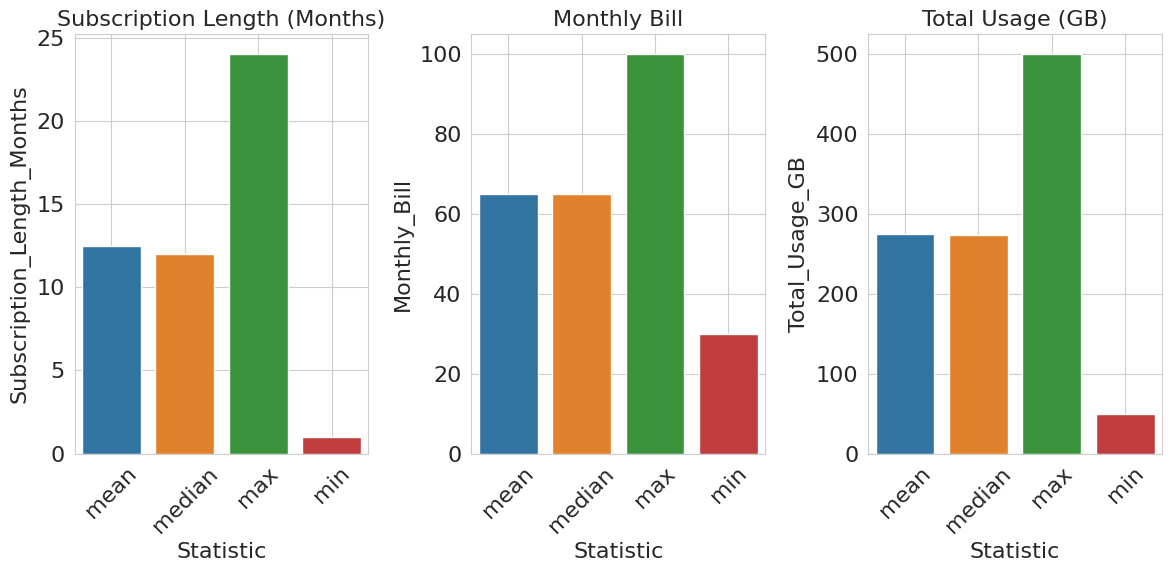

In [258]:
# Feature Aggregation - Calculate basic statistics (mean, median, max, min) for the three columns
agg_stats = df.agg({
    'Subscription_Length_Months': ['mean', 'median', 'max', 'min'],
    'Monthly_Bill': ['mean', 'median', 'max', 'min'],
    'Total_Usage_GB': ['mean', 'median', 'max', 'min']
}).reset_index()

# Rename columns for clarity
agg_stats.columns = ['Statistic', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# EDA - Visualizing Aggregated Statistics
plt.figure(figsize=(12, 6))

# Subscription Length
plt.subplot(1, 3, 1)
sns.barplot(data=agg_stats, x='Statistic', y='Subscription_Length_Months')
plt.title('Subscription Length (Months)')
plt.xticks(rotation=45)
plt.grid(True)

# Monthly Bill
plt.subplot(1, 3, 2)
sns.barplot(data=agg_stats, x='Statistic', y='Monthly_Bill')
plt.title('Monthly Bill')
plt.xticks(rotation=45)
plt.grid(True)

# Total Usage
plt.subplot(1, 3, 3)
sns.barplot(data=agg_stats, x='Statistic', y='Total_Usage_GB')
plt.title('Total Usage (GB)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [259]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                                 Age  Subscription_Length_Months  \
Age                         1.000000                    0.003382   
Subscription_Length_Months  0.003382                    1.000000   
Monthly_Bill                0.001110                   -0.005294   
Total_Usage_GB              0.001927                   -0.002203   
Churn                       0.001559                    0.002328   

                            Monthly_Bill  Total_Usage_GB     Churn  
Age                             0.001110        0.001927  0.001559  
Subscription_Length_Months     -0.005294       -0.002203  0.002328  
Monthly_Bill                    1.000000        0.003187 -0.000211  
Total_Usage_GB                  0.003187        1.000000 -0.002842  
Churn                          -0.000211       -0.002842  1.000000  


<ipython-input-259-54323a2ad464>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


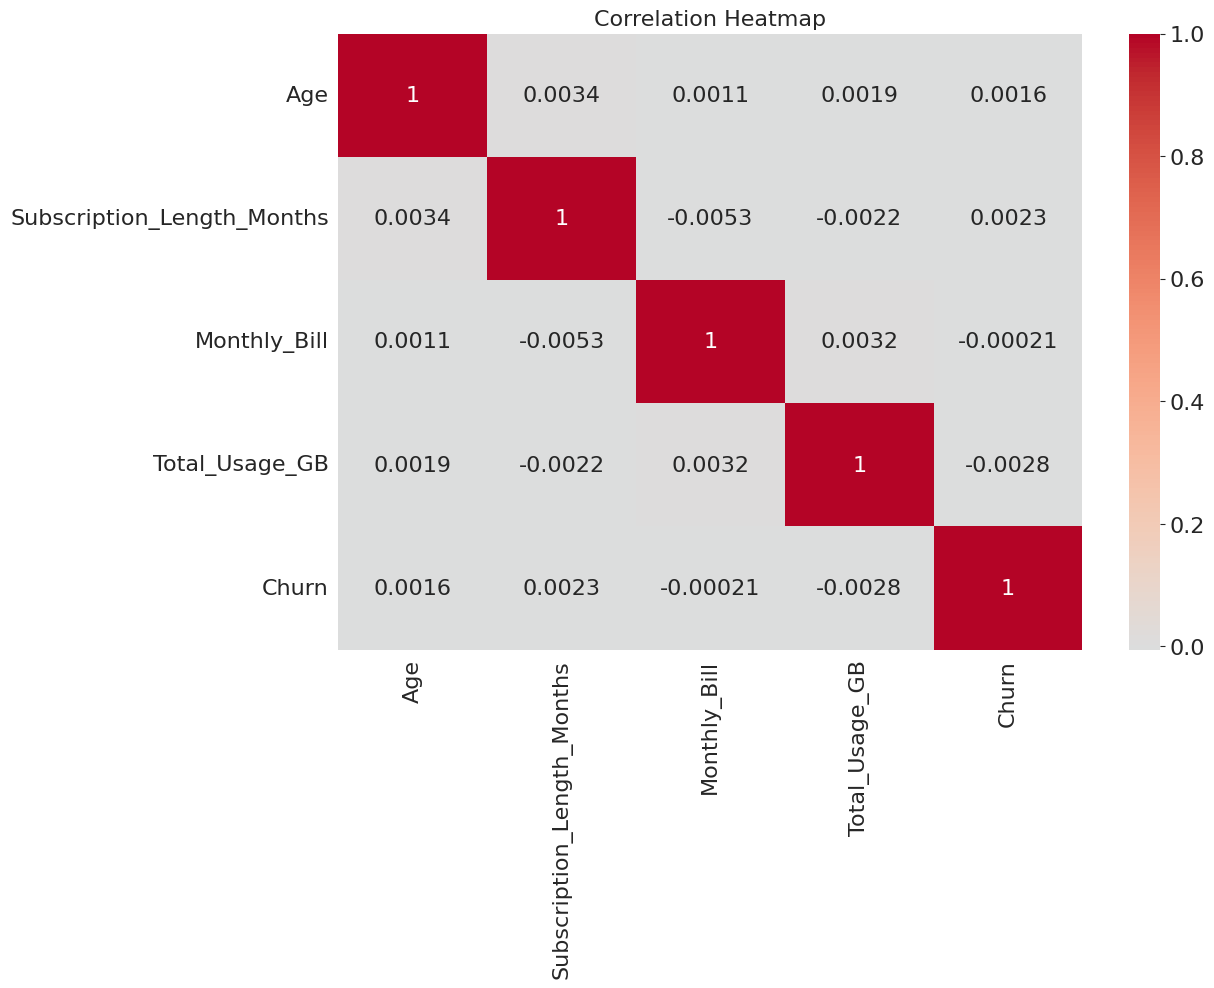

In [260]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


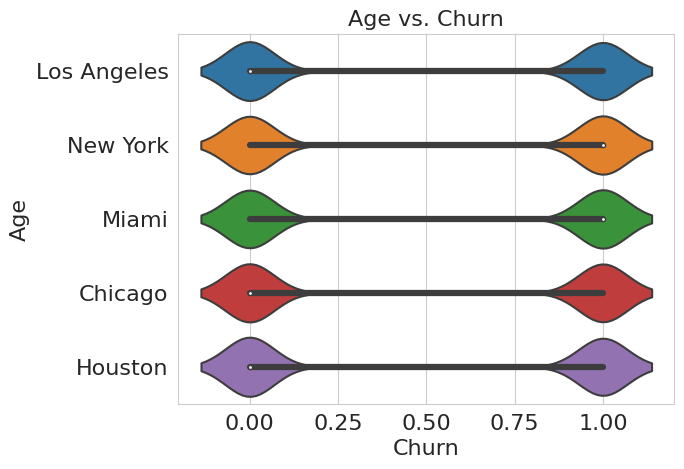

In [261]:
sns.violinplot(data=df, x='Churn', y='Location')
plt.title(f'Age vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

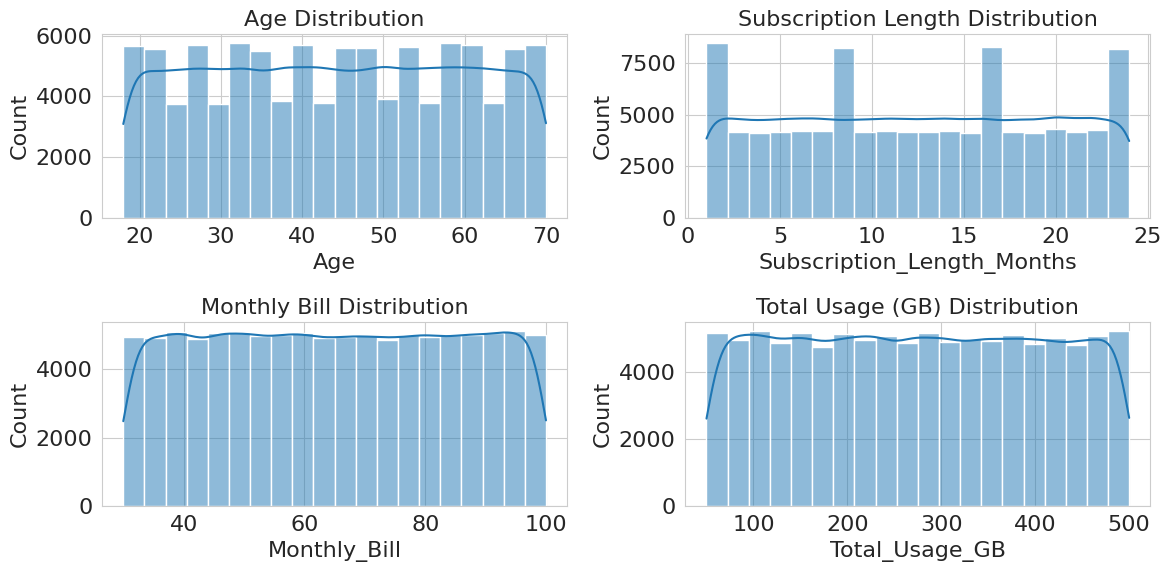

In [262]:
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Subscription_Length_Months'], bins=20, kde=True)
plt.title('Subscription Length Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Monthly_Bill'], bins=20, kde=True)
plt.title('Monthly Bill Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Total_Usage_GB'], bins=20, kde=True)
plt.title('Total Usage (GB) Distribution')

plt.tight_layout()
plt.show()

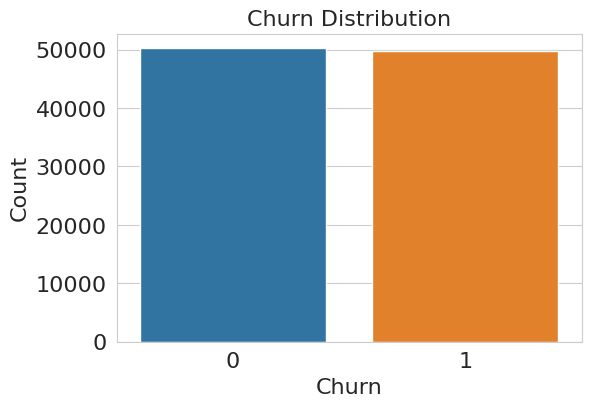

In [263]:
# 2. Churn Distribution (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

We observe that the data is perfectly balanced.

In [264]:
def age_bins(Age):
    if Age < 29:
        return "Young"
    elif 29 <= Age <= 60:
        return "Middle-aged"
    else:
        return "Old"

# making bins according to age
df['Age_Bins'] = df['Age'].apply(age_bins)




In [265]:
mean_bill = df['Monthly_Bill'].mean()
median_bill = df['Monthly_Bill'].median()

# Defining threshholds
low_threshold = mean_bill - (0.5 * (mean_bill - median_bill))
high_threshold = mean_bill + (0.5 * (mean_bill - median_bill))

# Binning
def bill_bins(monthly_bill):
    if monthly_bill <= low_threshold:
        return "Low"
    elif low_threshold < monthly_bill <= high_threshold:
        return "Medium"
    else:
        return "High"

# applying binning
df['Bill_Category'] = df['Monthly_Bill'].apply(bill_bins)


In [266]:
contingency_table = pd.crosstab(df['Age_Bins'], df['Bill_Category'])

# Calculate the chi-squared statistic and degrees of freedom
chi2, _, _, _ = chi2_contingency(contingency_table)

#  Cramer's V
n = df.shape[0]  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum of (number of rows, number of columns) minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramer's V:", cramers_v)

Cramer's V: 0.007715792284684993


In [267]:
mean_length = df['Subscription_Length_Months'].mean()
median_length = df['Subscription_Length_Months'].median()

# Define the bins and labels
bins = [0, median_length, mean_length, df['Subscription_Length_Months'].max()]
labels = ['Short', 'Medium', 'Long']

# Create a new column 'Subscription_Length_Bins' based on the bins and labels
df['Subscription_Length_Bins'] = pd.cut(df['Subscription_Length_Months'], bins=bins, labels=labels, right=False)

In [268]:
# Create a contingency table (cross-tabulation) of the two categorical variables
contingency_table = pd.crosstab(df['Age_Bins'], df['Subscription_Length_Bins'])

# Calculate the chi-squared statistic and degrees of freedom
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = df.shape[0]  # Total number of observations
min_dim = min(contingency_table.shape) - 1  # Minimum of (number of rows, number of columns) minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Print Cramer's V statistic
print("Cramer's V:", cramers_v)

Cramer's V: 0.003456628619859788


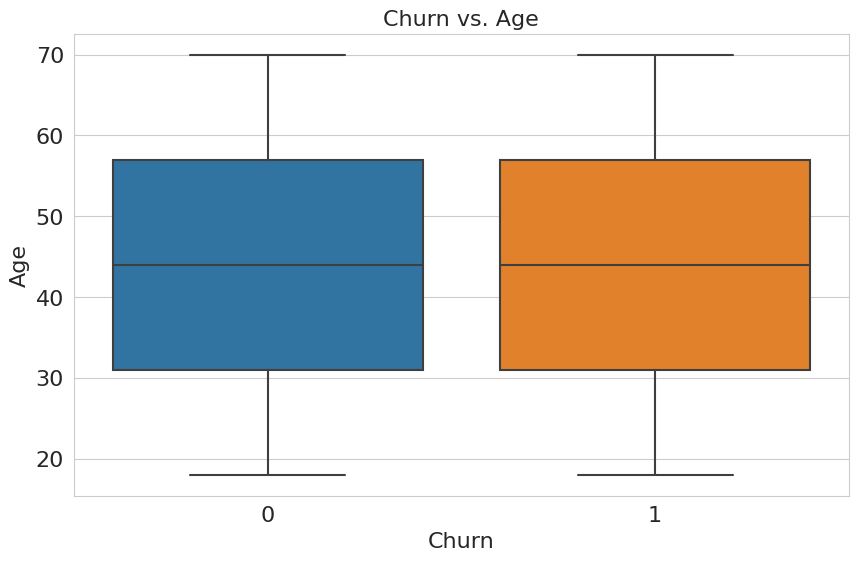

In [269]:
# Customer Segmentation (Box Plots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Age')
plt.title('Churn vs. Age')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

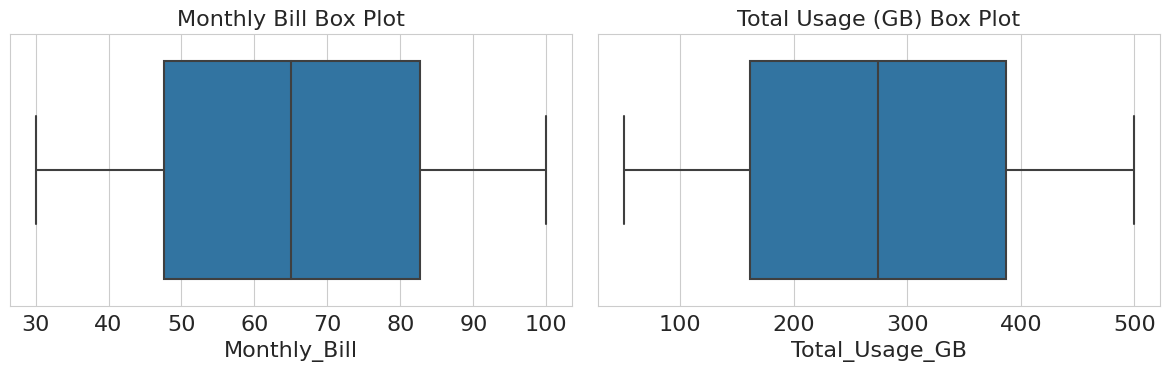

In [270]:
# 5. Outlier Detection (Box Plots)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Monthly_Bill')
plt.title('Monthly Bill Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Total_Usage_GB')
plt.title('Total Usage (GB) Box Plot')

plt.tight_layout()
plt.show()


In [271]:
unique_locations = df['Location'].unique()

for location in unique_locations:
    churned_count = df[(df['Location'] == location) & (df['Churn'] == 1)]['Churn'].count()
    total_count = df[df['Location'] == location]['Churn'].count()
    churn_percentage = (churned_count / total_count) * 100

    print(f"Percent of People Who Churned from {location} ---> {churn_percentage:.2f}%")


Percent of People Who Churned from Los Angeles ---> 49.30%
Percent of People Who Churned from New York ---> 50.37%
Percent of People Who Churned from Miami ---> 50.30%
Percent of People Who Churned from Chicago ---> 49.83%
Percent of People Who Churned from Houston ---> 49.11%


In [272]:

X = df.drop('Churn', axis=1)
y = df['Churn']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

numeric_features = ['Subscription_Length_Months', 'Total_Usage_GB']
#'Monthly_Bill',
categorical_features = ['Location', 'Gender']

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))  # 'drop' avoids multicollinearity by dropping one category
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

X_train_processed = pipeline.fit_transform(X_train)

# Transform the test data using the fitted pipeline
X_test_processed = pipeline.transform(X_test)

In [273]:
log = LogisticRegression(penalty = "l2", C = 0.01, max_iter = 100, random_state=42)

# Fit the model to the training data
log.fit(X_train_processed, y_train)

# Predict on the test data
y_pred = log.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.505375
Confusion Matrix:
 [[13076  7031]
 [12754  7139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.65      0.57     20107
           1       0.50      0.36      0.42     19893

    accuracy                           0.51     40000
   macro avg       0.51      0.50      0.49     40000
weighted avg       0.51      0.51      0.49     40000



In [274]:
# specifying param
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

# Creating a grid search
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print( best_score)
best_model = grid_search.best_estimator_



{'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}
0.5006333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [279]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.4955
Confusion Matrix:
[[10008 10099]
 [10081  9812]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     20107
           1       0.49      0.49      0.49     19893

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000

